In [110]:
#Imports
import sys, os
redux_directory = '/Users/catherinemanea/Box/GalArchLab/TullRedux/'
sys.path.insert(0, os.path.abspath(redux_directory))
import importlib

#import redux

import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Redux.py successfully loaded in.




Start by accumulating your files using "glob" or any similar tool:

In [88]:
bias_files = glob.glob("/Users/catherinemanea/Box/GalArchLab/Data/Obs/HVS_obs/UT190401/Bias*.fits")
flat_files = glob.glob("/Users/catherinemanea/Box/GalArchLab/Data/Obs/HVS_obs/UT190401/Flat*.fits")
obj_files = np.array(["/Users/catherinemanea/Box/GalArchLab/Data/Obs/HVS_obs/UT190401/Star0001.fits", "/Users/catherinemanea/Box/GalArchLab/Data/Obs/HVS_obs/UT190401/Star0002.fits"])
thar_files = glob.glob("/Users/catherinemanea/Box/GalArchLab/Data/Obs/HVS_obs/UT190401/ThAr*.fits")
sun_files = glob.glob("/Users/catherinemanea/Box/GalArchLab/Data/Obs/HVS_obs/UT190401/solar*.fits")

Extract data + header info (data will be stacks of 2-d arrays, one per exposure)

In [89]:
bias_headers, bias_data, bias_objs, bias_dates, bias_exps = redux.fits_to_img(bias_files)
flat_headers, flat_data, flat_objs, flat_dates, flat_exps = redux.fits_to_img(flat_files)
obj_headers, obj_data, obj_objs, obj_dates, obj_exps = redux.fits_to_img(obj_files)
thar_headers, thar_data, thar_objs, thar_dates, thar_exps = redux.fits_to_img(thar_files)
sun_headers, sun_data, sun_objs, sun_dates, sun_exps = redux.fits_to_img(sun_files)

Finished extracting zero file(s)
Finished extracting flat file(s)
Finished extracting HD84937 file(s)
Finished extracting ThAr file(s)
Finished extracting Solar Port file(s)


Make your bias and flat frames

In [90]:
bias_frame = redux.make_bias(bias_data)
flat_frame_intermed = redux.make_flat(flat_data, flat_exps, bias_frame)

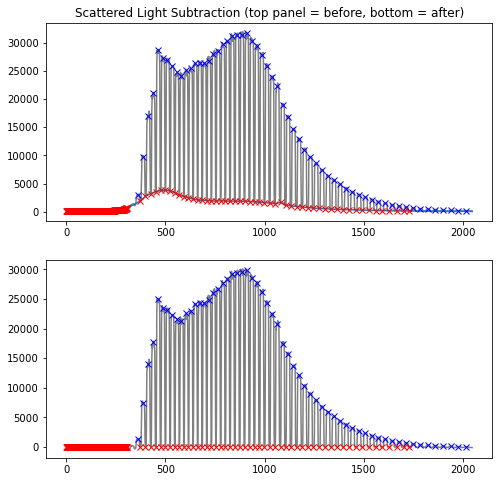

Scattered Light Subtraction:  99  %

Order Tracing:  98  %
 Scattered light subtraction and order tracing complete.


In [91]:
%matplotlib inline
flat_frame, columns, order_centers, num_of_ords, orders, xx, yy, trough_s = redux.scatter_light_sub_and_order_trace(flat_frame_intermed)

Let's inspect our bias and flat frames.

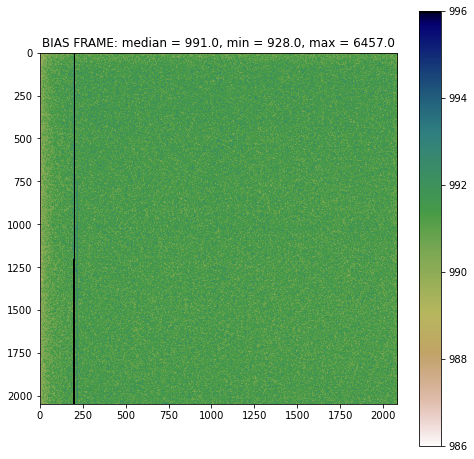

In [92]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.imshow(bias_frame, cmap='gist_earth_r', vmin=np.nanmedian(bias_frame)-5, vmax=np.nanmedian(bias_frame)+5)
plt.colorbar()
plt.title("BIAS FRAME: median = {a}, min = {b}, max = {c}".format(a=np.nanmedian(bias_frame), b=np.nanmin(bias_frame), c=np.nanmax(bias_frame)))
plt.show()

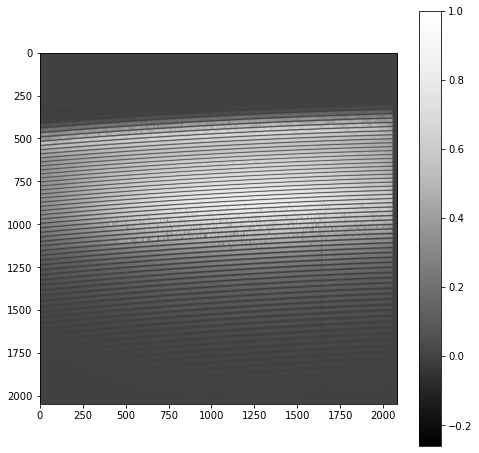

In [93]:
%matplotlib inline

plt.figure(figsize=(8,8))
plt.imshow(flat_frame_intermed/np.nanmax(flat_frame_intermed), cmap='Greys_r')
plt.colorbar()
plt.title("FLAT FRAME: median = {a}, min = {b}, max = {c}".format(a=np.nanmedian(flat_frame), b=np.nanmin(flat_frame), c=np.nanmax(flat_frame)))
plt.show()

Inspect order tracing:

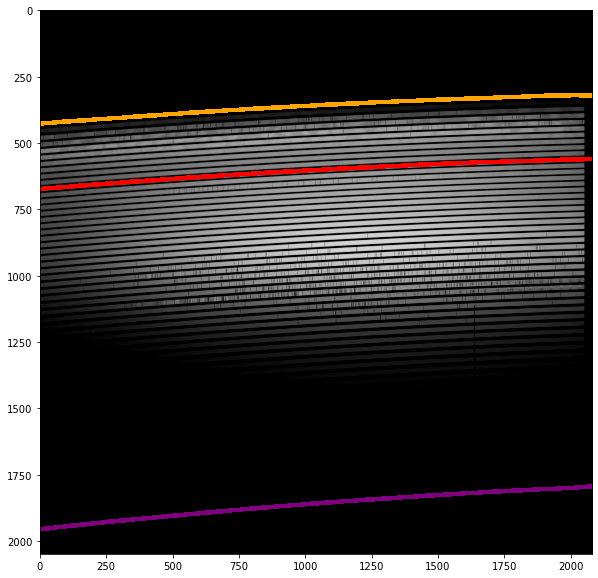

In [94]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(flat_frame_intermed/np.nanmax(flat_frame_intermed), cmap='gray', vmin=0.1, vmax=1)
#plt.scatter(column_grid[0], order_centers[0], marker='.', s=5, color='red')
plt.scatter(xx[orders[0]], yy[orders[0]], s=8, color='orange', marker='+')
plt.scatter(xx[orders[10]], yy[orders[10]], s=8, color='red', marker='+')
plt.scatter(xx[orders[54]], yy[orders[54]], s=8, color='purple', marker='+')
plt.show()
plt.close()


Extract spectrum of sun:

In [126]:
%matplotlib notebook
importlib.reload(redux)
sun_pixels, sun_fluxes = redux.extract_obj_spec(sun_data[0], sun_objs[0], sun_exps[0], bias_frame, flat_frame_intermed/np.nanmax(flat_frame_intermed), orders, num_of_ords, trough_s)


Redux.py successfully loaded in.


Extracting 1d spectrum of  Solar Port


/Users/catherinemanea/Box/GalArchLab/TullRedux/redux.py:153: RuntimeWarning: divide by zero encountered in true_divide
  data = data/flat_frame
/Users/catherinemanea/Box/GalArchLab/TullRedux/redux.py:153: RuntimeWarning: invalid value encountered in true_divide
  data = data/flat_frame
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Finished extracting 1d spectrum of  Solar Port 



In [127]:
from astropy.table import Table
sun_waves = []
sun_ints = []
sun_ords = []
for ord in range(num_of_ords):
    sun_waves.append(sun_pixels[ord])
    sun_ints.append(sun_fluxes[ord])
    sun_ords.append(np.repeat(ord, len(sun_pixels[ord])))
t = Table([np.concatenate(sun_ords).ravel(), np.concatenate(sun_waves).ravel(), np.concatenate(sun_ints).ravel()], names=('Ord', 'Pix', 'Counts'))

<IPython.core.display.Javascript object>


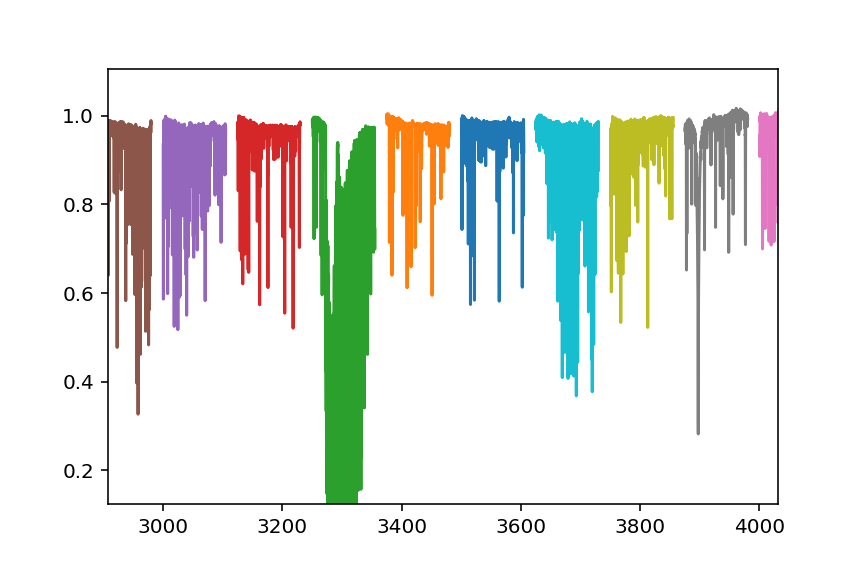

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[4826.44475782 4713.42139333    0.            0.            0.
    0.         4002.01485128 3881.89802885 3753.96812231 3630.71578586
 3502.06625315 3375.42139333 3252.4774681  3127.01485128 3004.17372978
 2876.50083259 2855.07559894 2627.27186062 2604.92139333 2479.66438399
 2250.42139333    0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.        ] [339657.28011093 173674.11225935      0.              0.
      0.              0.         367498.40036703 424502.95260208
 483251.43876662 530076.76150222 565409.39384334 593494.43384621
 605628.04906853 6164

In [128]:
#ORD = 25
v = -5
#R = 113400

zack_sun = Table.read('/Users/catherinemanea/Box/GalArchLab/TullRedux/bacchus_ready_rv_cor_star0001_Twilight_UT220617_norm.txt', format='ascii')
# sol_fluxes = np.flip((t['Counts'][t['Ord'] == ORD]/np.nanmax(t['Counts'][t['Ord'] == ORD][:v]))[:v])

maxies = np.zeros(np.max(t['Ord']))
wavies = np.zeros(np.max(t['Ord']))
pix_full = []
plt.figure()
for ordi in range(np.max(t['Ord'])):
    
        sol_fluxes = np.flip(t['Counts'][t['Ord'] == ordi][5:v])
        sol_pixels = -ordi*125+(t['Pix'][t['Ord'] == ordi]*(5500/107000) + np.nanmin(zack_sun['waveobs']))[5:v]
        if (np.nanmax(sol_fluxes) < 800000):
            maxies[ordi] = np.nanmax(sol_fluxes)
            wavies[ordi] = sol_pixels[np.where(sol_fluxes == np.nanmax(sol_fluxes))]
            pix_full.append(sol_pixels)
#         plt.plot(sol_pixels, sol_fluxes)
z = np.polyfit(wavies[wavies>0], maxies[wavies>0], 7)   
p = np.poly1d(z)
# plt.scatter(wavies[wavies>0], maxies[wavies>0])
# plt.plot(np.concatenate(pix_full), p(np.concatenate(pix_full)))
for ordi in range(30):
    print(ordi)
    if ordi != 27:
        sol_fluxes = np.flip(t['Counts'][t['Ord'] == ordi][5:v])
        sol_pixels = -ordi*125+(t['Pix'][t['Ord'] == ordi]*(5500/107000) + np.nanmin(zack_sun['waveobs']))[5:v]
        plt.plot(sol_pixels, sol_fluxes/p(sol_pixels), label=ordi)
#plt.legend()
plt.show()

print(wavies, maxies)